In [1]:
import cv2
import numpy as np
import pyautogui
from matplotlib import pyplot as plt
# if want to add current dir as path
# import sys
# sys.path.append('.')

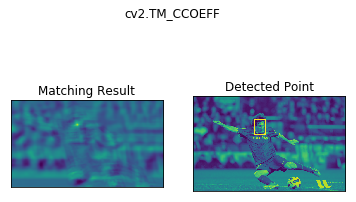

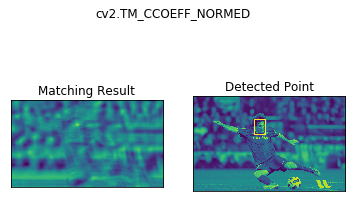

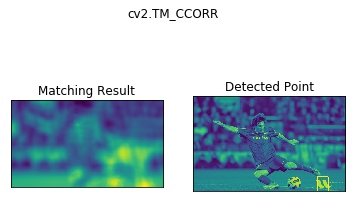

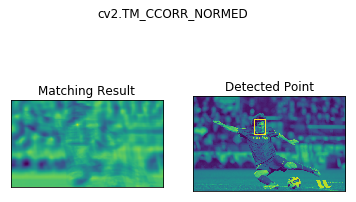

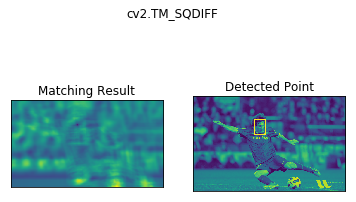

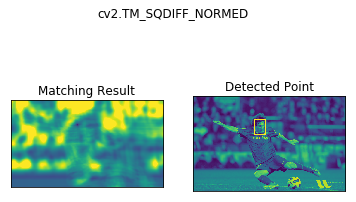

In [19]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html


img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('messi_face.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [2]:
# https://www.pyimagesearch.com/2018/01/01/taking-screenshots-with-opencv-and-python/
# screenshot 
# take a screenshot of the screen and store it in memory, then
# convert the PIL/Pillow image to an OpenCV compatible NumPy array
# and finally write the image to disk

screenshot = pyautogui.screenshot()
screenshot = cv2.cvtColor(np.array(screenshot), cv2.COLOR_RGB2BGR)
cv2.imwrite("image.jpg", screenshot)

True

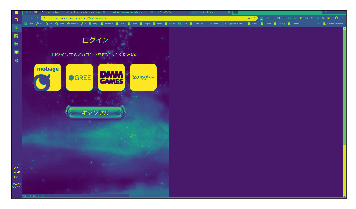

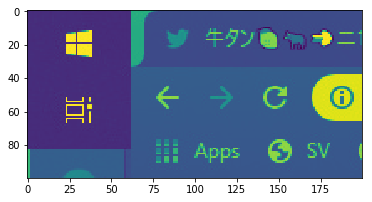

In [15]:
screenshot = cv2.imread('image.jpg',0)


plt.imshow(screenshot)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img = screenshot.copy()

# height, width, number of channels in image
dimensions = img.shape
height = img.shape[0]
width = img.shape[1]

# chop or indicate which area to search
chopped = img[0:100, 0:200] #image[y:y+h , x:x+w]
plt.imshow(chopped)
plt.show()
#cv2.matchTemplate(roi, templ, ...
# loop until found
#    identify not found
# feed coordinate and click

In [16]:
input = cv2.imread('image.jpg',0) # load color channel as is

#input.shape # find channel
# convert and split hsv
hsv = cv2.cvtColor(input, cv2.COLOR_RGB2HSV)

h,s,v = cv2.split(hsv);
        
# https://stackoverflow.com/questions/29156091/opencv-edge-border-detection-based-on-color
plt.imshow(h)
plt.show()
plt.imshow(s)
plt.show()
plt.imshow(v)
plt.show()

AttributeError: module 'cv2' has no attribute 'COLOR_GRAY2HSV'

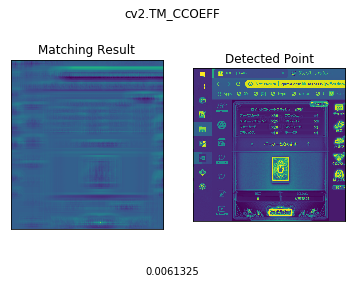

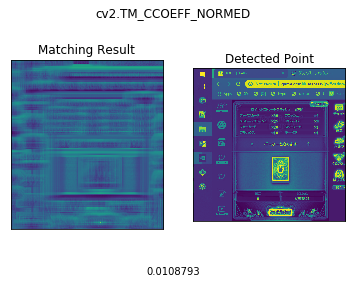

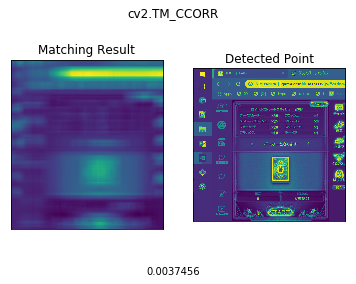

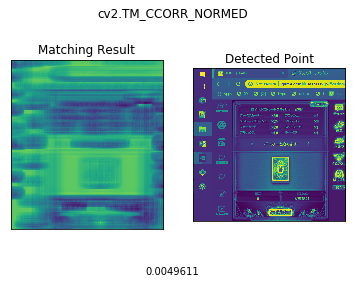

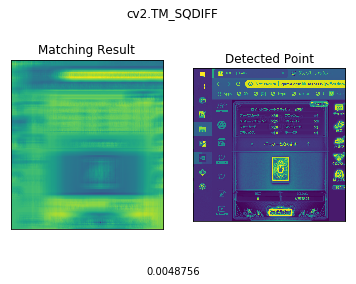

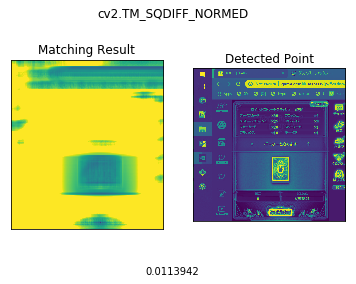

In [22]:
# try all 6 methods
img = cv2.imread('poker_start_screenshot.jpg',0)
img = img[0:500, 0:500]
img2 = img.copy()
template = cv2.imread('templates/start.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    # measure performance
    e1 = cv2.getTickCount()
    
    # start image processing
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    
    # end of img processing, measure perf
    e2 = cv2.getTickCount()
    
    # mark found region
    cv2.rectangle(img,top_left, bottom_right, 255, 2)  

    plt.subplot(121),plt.imshow(res)
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    time = (e2 - e1)/ cv2.getTickFrequency()
    plt.figtext(.5, .05, time, ha='center')

    plt.show()